Loading Libraries


In [40]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


Loading The Dataset

In [41]:

# Load Dataset
df = pd.read_csv("Sentiment_analysis_dataset.csv")
# Inspect Data
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())



Dataset Head:
                                           Statement      Status
0  life doesn’t feel worth it that’s kind of it? ...  Depression
1  This life sucks and if it were for my religiou...  Depression
2  its been 9 months now for our marriage and she...      Stress
3  I do not feel particularly sad or anxious or a...  Depression
4  I am taking Venlafaxine. it is an SSRI. does n...  Depression

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37130 entries, 0 to 37129
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  36876 non-null  object
 1   Status     37130 non-null  object
dtypes: object(2)
memory usage: 580.3+ KB
None


Plotting Visualizations For Missing Values


Missing Values:
Statement    254
Status         0
dtype: int64
Missing Values Per Class:
                      Statement  Status
Status                                 
Anxiety                      30       0
Bipolar                      73       0
Depression                    0       0
Normal                        6       0
Personality disorder         85       0
Stress                       59       0
Suicidal                      1       0


C:\Users\user\AppData\Local\Temp\ipykernel_5376\1257709701.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_per_class = df.groupby("Status").apply(lambda x: x.isnull().sum())


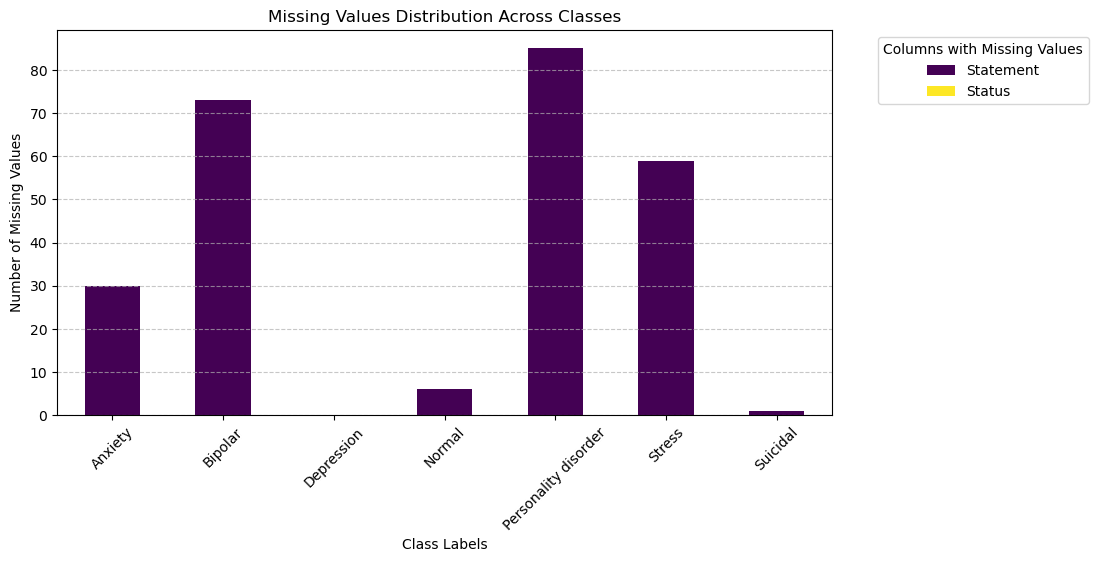

Number of Instances Per Class:
Status
Normal                  11446
Depression              10783
Suicidal                 7457
Anxiety                  2721
Bipolar                  2014
Stress                   1868
Personality disorder      841
Name: count, dtype: int64


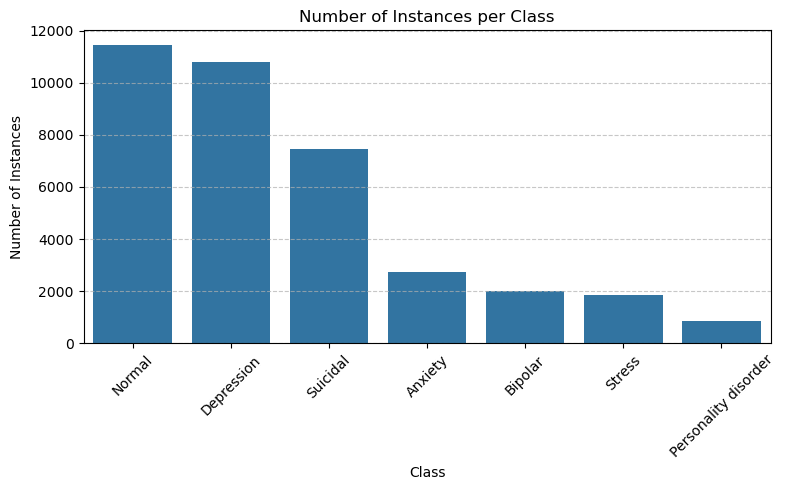

In [42]:

# Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


# Check for missing values per class
missing_values_per_class = df.groupby("Status").apply(lambda x: x.isnull().sum())

# Display missing values per class
print("Missing Values Per Class:")
print(missing_values_per_class)


# Plot Bar Graph
missing_values_per_class.plot(kind='bar', figsize=(10, 5), stacked=True, colormap='viridis')
plt.title("Missing Values Distribution Across Classes")
plt.xlabel("Class Labels")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.legend(title="Columns with Missing Values", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Count instances per class
class_counts = df['Status'].value_counts()

# Print number of instances per class
print("Number of Instances Per Class:")
print(class_counts)

# Plot number of instances per class
plt.figure(figsize=(8,5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Number of Instances per Class")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Dropping The Rows Of The Missing Statements In The Data

In [43]:
before_drop = df.shape[0]

# Drop rows with missing 'Statement'
df.dropna(subset=['Statement'], inplace=True)
df.reset_index(drop=True, inplace=True)

after_drop = df.shape[0]

print(f"Rows before drop: {before_drop}")
print(f"Rows after drop: {after_drop}")
print(f"Total rows dropped: {before_drop - after_drop}")






Rows before drop: 37130
Rows after drop: 36876
Total rows dropped: 254


The Below Code is for data cleaning

In [44]:

# Download stopwords if not already downloaded
nltk.download('stopwords')

port_stem = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

df['Statement'] = df['Statement'].apply(stemming)

df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Statement,Status
0,life feel worth kind made lot discoveri last y...,Depression
1,life suck religi belief suicid send hell would...,Depression
2,month marriag manag sleep light cant even thin...,Stress
3,feel particularli sad anxiou anyth feel like w...,Depression
4,take venlafaxin ssri cure depress certainli ta...,Depression


In [45]:
print(df)


                                               Statement                Status
0      life feel worth kind made lot discoveri last y...            Depression
1      life suck religi belief suicid send hell would...            Depression
2      month marriag manag sleep light cant even thin...                Stress
3      feel particularli sad anxiou anyth feel like w...            Depression
4      take venlafaxin ssri cure depress certainli ta...            Depression
...                                                  ...                   ...
36871  feel like whole life wa joke problem concentr ...            Depression
36872  procrastin desir kill long time want start los...            Depression
36873                                            rengoku                Normal
36874  head foggi stare nothing cannot keep convers g...            Depression
36875  constantli draw blank brain fog honestli feel ...  Personality disorder

[36876 rows x 2 columns]
